In [75]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')

In [24]:
import numpy as np4
import pandas as pd
from pandas import DataFrame,Series
import seaborn as sns
plt.rcParams["patch.force_edgecolor"]=True

In [2]:
titanic_df=pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

# Factor plots

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


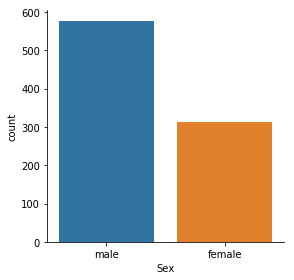

In [13]:
sns.factorplot(x='Sex',data=titanic_df,kind='count')

### Factor plot Pclass vs Sex

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


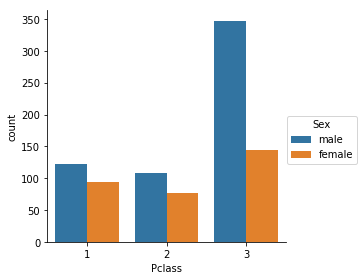

In [17]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

### Split apply combine technique in analysis

#### Function to apply

In [18]:
def male_f_child(passenger):
    age,sex=passenger
    if(age<16):
        return 'child'
    else:
        return sex
    
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_f_child,axis=1)

# AXIS = 1 For Columns always remember

In [20]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


## Let's apply factor plot on above created column PClass vs person

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


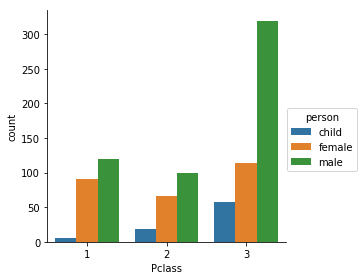

In [22]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count',hue_order=['child','female','male'])

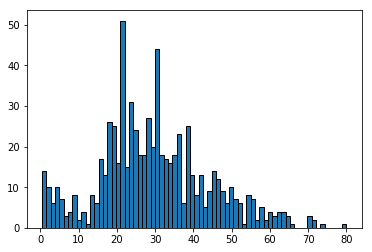

In [26]:
titanic_df.Age.hist(bins=70,grid=False)

#### Having a value counts of persons

In [27]:
titanic_df.person.value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

### Multiple KDE plot using facetGrid

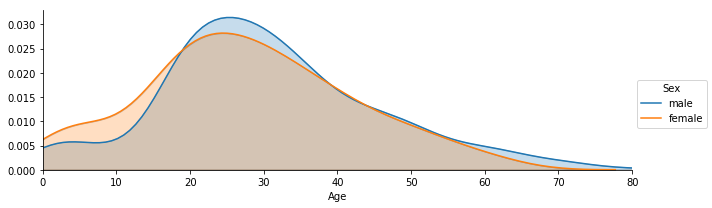

In [31]:
fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=3)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

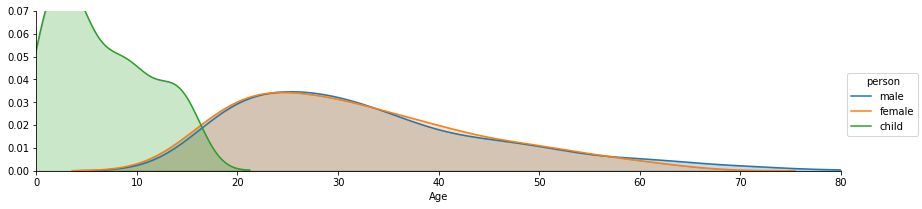

In [41]:
fig=sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(ylim=(0,0.070))
fig.add_legend()

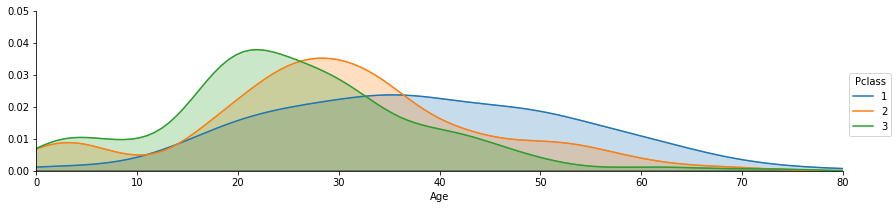

In [38]:
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(ylim=(0,0.050))
fig.add_legend()

# dropping null values of cabin feature

In [42]:
deck=titanic_df.Cabin.dropna()

In [43]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

### Grabbing first letter of the cabin 

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


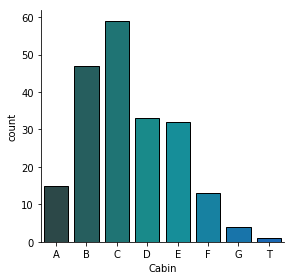

In [47]:
levels=[]
for level in deck:
    levels.append(level[0])
cabin_df=DataFrame(levels,columns=['Cabin'])
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count',order=['A','B','C','D','E','F','G','T'])

The 'T' deck value does'nt make any sense so we can drop it out with the below code:

In [48]:
cabin_df=cabin_df[cabin_df.Cabin!='T']

In [49]:
cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
5,D
6,A
7,C
8,B
9,D


E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


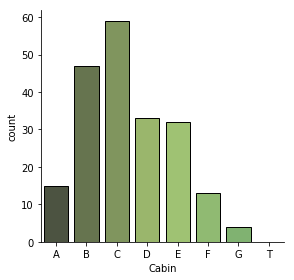

In [52]:
sns.factorplot('Cabin',data=cabin_df,kind='count',order=['A','B','C','D','E','F','G','T'],palette='summer_d')

## to check from where the passengers boarded 

##### This can be seen that the places of boarding are cherbourg (C),queenstown(Q),southhampton(S) 

### Now we will check that how classes of passengers and the place from where they boarded related

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


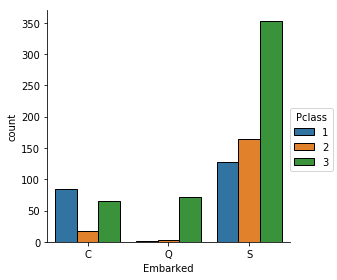

In [56]:
sns.factorplot("Embarked",data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation

In [57]:
titanic_df['Alone']=titanic_df['SibSp']+titanic_df['Parch']

In [58]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [59]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'

E:\ANACONDA\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [60]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


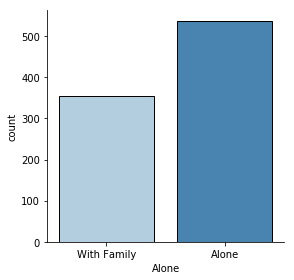

In [61]:
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count')

# Analysing the factors Resposible for Surviving

In [62]:
titanic_df['Survivor']=titanic_df['Survived']

In [64]:
titanic_df['Survivor'].loc[titanic_df['Survivor']==1]='Yes'
titanic_df['Survivor'].loc[titanic_df['Survivor']==0]='No'


E:\ANACONDA\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [65]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


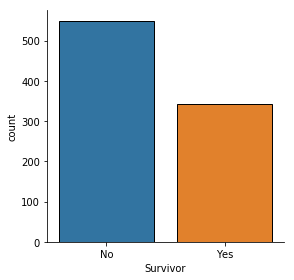

In [67]:
sns.factorplot('Survivor',data=titanic_df,kind='count')

## Pclass Vs Survived

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


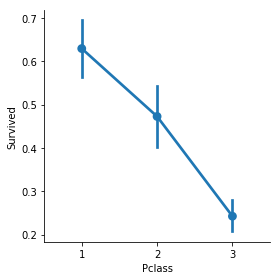

In [68]:
sns.factorplot('Pclass','Survived',data=titanic_df)

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


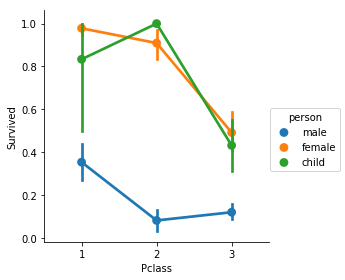

In [69]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

### Effect of age on survival rate

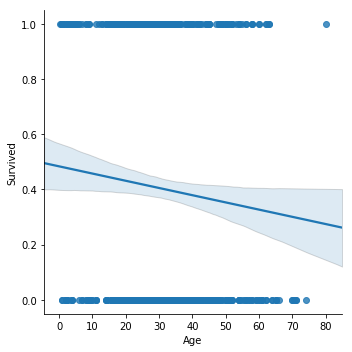

In [70]:
sns.lmplot('Age','Survived',data=titanic_df)

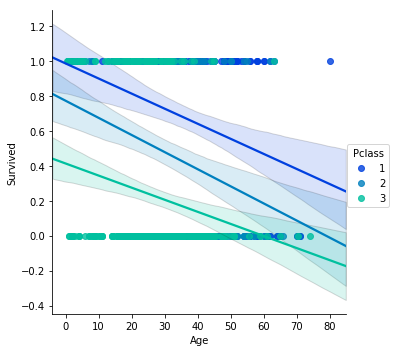

In [71]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

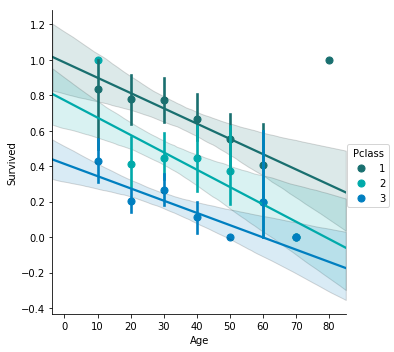

In [73]:
age=[10,20,30,40,50,60,70,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter_d',x_bins=age)

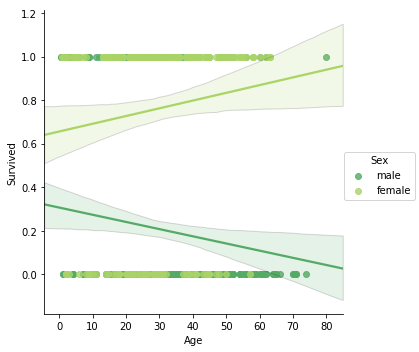

In [74]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='summer')

In [82]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,No
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,No
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,No
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,Yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,Yes


E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


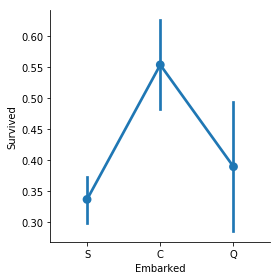

In [79]:
sns.factorplot('Embarked','Survived',data=titanic_df)

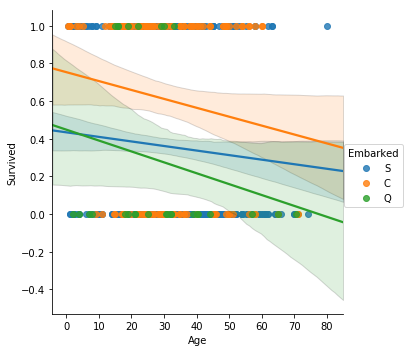

In [80]:
sns.lmplot('Age','Survived',hue='Embarked',data=titanic_df)

In [108]:
titanicdf1=titanic_df

In [111]:
titanicdf1=titanicdf1.dropna(subset=['Cabin'])

In [112]:
levels=[]
for i in titanicdf1.Cabin:
    levels.append(i[0])
cabin_df=DataFrame(levels,columns=['Deck'])

In [114]:
titanicdf1['Deck']=cabin_df

E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Odd of survival when having a family

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


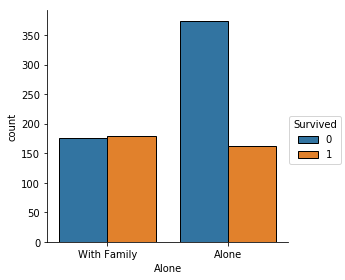

In [135]:
sns.factorplot('Alone',kind='count',hue='Survived',data=titanic_df)

In [134]:
titanicdf1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes,G
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,No,A
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,Yes,B
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,Yes,C
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,male,Alone,Yes,C
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,male,Alone,Yes,E
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,male,With Family,No,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,female,With Family,Yes,E
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,female,With Family,Yes,B


In [145]:
mpl.rcParams['figure.figsize'] = (40.0, 15.0)

In [146]:
import matplotlib as mpl

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


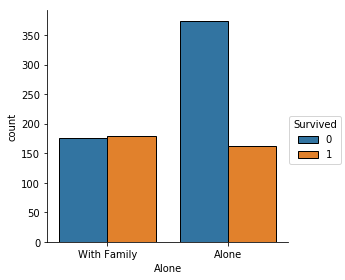

In [147]:
sns.factorplot('Alone',kind='count',hue='Survived',data=titanic_df)

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


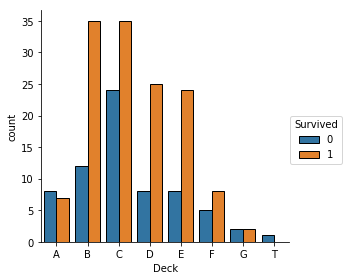

In [153]:
deck = []

for i in titanic_df['Cabin']:
    
    if str(i) == 'NaN':
        deck.append(0)
    else:
        deck.append(str(i)[0])
        
titanic_df['Deck'] = deck

sns.factorplot('Deck', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], data=titanic_df, hue='Survived',kind='count')